In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import math 
import sklearn
import seaborn as sns
import matplotlib.dates as mdates

pd.options.mode.chained_assignment = None
%matplotlib inline

In [20]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")
data = train.append(test, ignore_index=True,sort=False)
train.shape,test.shape,data.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((17521, 2395), (20442, 2394), (37963, 2395))

In [7]:
# data.fillna(999999999, inplace=True)

In [60]:
data1=data.copy()
data=data.dropna(axis=1,how='any',inplace=False)

#data['Col2']=data1['Col2']
del data['Col1']

In [61]:
%%time
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

data2 = correlation(data, 0.90)

               Col3          Col5          Col9         Col10         Col12  \
0      1.086711e+04  1.576618e+04  1.285597e+04  2.871509e+04  3.043078e+04   
1      2.584312e+05  1.866287e+05  1.726538e+05  1.666974e+05  1.859404e+05   
2      1.459355e+07  1.100315e+07  5.320778e+06  6.906324e+06  1.113330e+07   
3      6.727043e+05  6.794893e+05  3.577134e+05  4.236612e+05  4.065539e+05   
4     -1.218742e+06 -1.666241e+05  5.938358e+06  5.446532e+06  3.262168e+06   
5      3.911176e+06  2.995007e+06  1.610207e+06  2.116667e+06  1.536280e+06   
6      1.173942e+05  8.499665e+04  3.618990e+04  3.618990e+04  4.065046e+04   
7      2.582386e+05  2.104294e+05  9.263240e+04  5.521743e+04  2.315825e+04   
8      1.463930e+04  1.928101e+04  2.573648e+03  2.380503e+03  3.849697e+03   
9      8.405841e+04  3.268636e+04  5.293322e+04  5.889939e+04  8.180899e+04   
10     8.331730e+04  3.469404e+04  3.742235e+04  2.776126e+04  3.452649e+04   
11     1.541710e+04  9.306876e+03  8.714554e+03  9.0

[37963 rows x 325 columns]
Wall time: 10min 32s


In [22]:
# data.replace(999999999, np.nan, inplace=True)

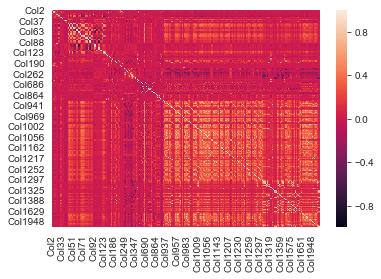

In [24]:
corr=data.corr()
sns.heatmap(corr)

In [62]:
data['Col1']=data1['Col1']
data['Col2']=data1['Col2']

data.head()

Col3          Col5          Col9         Col10         Col12  \
0  1.086711e+04  1.576618e+04  1.285597e+04  2.871509e+04  3.043078e+04   
1  2.584312e+05  1.866287e+05  1.726538e+05  1.666974e+05  1.859404e+05   
2  1.459355e+07  1.100315e+07  5.320778e+06  6.906324e+06  1.113330e+07   
3  6.727043e+05  6.794893e+05  3.577134e+05  4.236612e+05  4.065539e+05   
4 -1.218742e+06 -1.666241e+05  5.938358e+06  5.446532e+06  3.262168e+06   

      Col25     Col26  Col29  Col32  Col33  ...  Col1994  Col2002  Col2154  \
0  0.137398  0.115987      1      1      1  ...        0        2        3   
1  0.753892  0.808295      1      4      4  ...        2        0        1   
2  0.808115  0.776910      3     12      4  ...        2        3        2   
3 -0.125829  0.388830      2     24      1  ...        1        0        2   
4 -0.113101  0.617486      4     68      8  ...        1        1        0   

   Col2304  Col2336  Col2348  Col2357  Col2382       Col1  Col2  
0        0        1        0        0        0    RIGHGSN   1.0  
1        1        0        0        0        0  RIMHI5ZGP   0.0  
2        2        2        2        0        0  RIHOG1SZU   0.0  
3        2        3        0        0        0  RIHOLMQWU   0.0  
4        1        0        0        0        0  RIHO584ET   0.0  

[5 rows x 327 columns]

In [84]:
#data.columns[data.isnull().any()]

In [21]:
data.columns[data.dtypes == object]

Index(['Col1', 'Col702', 'Col733', 'Col742', 'Col747', 'Col754', 'Col763',
       'Col791', 'Col813', 'Col822', 'Col831', 'Col836', 'Col843', 'Col852'],
      dtype='object')

In [22]:
data=data.replace({'-': None})

In [23]:
data.Col702 = data.Col702.astype(float)
data.Col733 = data.Col733.astype(float)
data.Col742 = data.Col742.astype(float)
data.Col747 = data.Col747.astype(float)
data.Col754 = data.Col754.astype(float)
data.Col763 = data.Col763.astype(float)
data.Col791 = data.Col791.astype(float)
data.Col822 = data.Col822.astype(float)
data.Col831 = data.Col831.astype(float)
data.Col836 = data.Col836.astype(float)
data.Col843 = data.Col843.astype(float)
data.Col852 = data.Col852.astype(float)
data.columns[data.dtypes == object]

Index(['Col1'], dtype='object')

In [6]:
data.fillna(0, inplace=True)

In [7]:
# data1=data.copy()
# del data['Col2']
# del data['Col1']

# from sklearn.impute import IterativeImputer
# data_cols = list(data)
# data = pd.DataFrame(IterativeImputer(sample_posterior=True,n_nearest_features=10,verbose=2).fit_transform(data))
# data.columns = data_cols 

# data['Col1']=data1['Col1']
# data['Col2']=data1['Col2']

In [8]:
# #from fancyimpute import MICE
# from fancyimpute import IterativeImputer as MICE
# #fancy impute removes column names.
# data_cols = list(data)
# # Use 5 nearest rows which have a feature to fill in each row's missing features
# data = pd.DataFrame(MICE(verbose=2).fit_transform(data))
# data.columns = data_cols   

In [46]:
# import seaborn as sns
# ax = sns.heatmap(train_x, center=0)

In [12]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total    Percent
Col2     20442  53.847167
Col983       0   0.000000
Col951       0   0.000000
Col956       0   0.000000
Col957       0   0.000000
Col958       0   0.000000
Col959       0   0.000000
Col962       0   0.000000
Col963       0   0.000000
Col965       0   0.000000
Col966       0   0.000000
Col967       0   0.000000
Col969       0   0.000000
Col970       0   0.000000
Col971       0   0.000000
Col974       0   0.000000
Col975       0   0.000000
Col980       0   0.000000
Col981       0   0.000000
Col950       0   0.000000
Col949       0   0.000000
Col948       0   0.000000
Col938       0   0.000000
Col917       0   0.000000
Col918       0   0.000000
Col929       0   0.000000
Col934       0   0.000000
Col935       0   0.000000
Col936       0   0.000000
Col937       0   0.000000
...        ...        ...
Col1298      0   0.000000
Col1300      0   0.000000
Col1301      0   0.000000
Col1304      0   0.000000
Col1305      0   0.000000
Col1306      0   0.000000
Col1307      0   0.000000
Col1308      0   0.000000
Col1309      0   0.000000
Col1278      0   0.000000
Col1277      0   0.000000
Col1276      0   0.000000
Col1252      0   0.000000
Col1235      0   0.000000
Col1237      0   0.000000
Col1239      0   0.000000
Col1241      0   0.000000
Col1243      0   0.000000
Col1245      0   0.000000
Col1247      0   0.000000
Col1253      0   0.000000
Col1273      0   0.000000
Col1257      0   0.000000
Col1258      0   0.000000
Col1259      0   0.000000
Col1262      0   0.000000
Col1263      0   0.000000
Col1265      0   0.000000
Col1269      0   0.000000
Col3         0   0.000000

[327 rows x 2 columns]

In [13]:
data.describe()

Col3          Col5          Col9         Col10         Col12  \
count  3.796300e+04  3.796300e+04  3.796300e+04  3.796300e+04  3.796300e+04   
mean   3.477126e+04  2.824059e+04  3.111617e+04  3.145843e+04  3.740691e+04   
std    7.873542e+05  6.246031e+05  3.054594e+05  3.465422e+05  3.715909e+05   
min   -8.555719e+07 -7.011955e+07  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.898023e+03  1.966405e+03  1.896570e+03  1.844173e+03  3.112316e+03   
50%    1.009914e+04  6.894164e+03  6.120502e+03  5.843580e+03  8.331515e+03   
75%    3.265111e+04  2.202083e+04  1.942168e+04  1.850608e+04  2.257734e+04   
max    3.861868e+07  6.325956e+07  3.463760e+07  3.277868e+07  3.969719e+07   

              Col25         Col26         Col29         Col32         Col33  \
count  37963.000000  37963.000000  37963.000000  37963.000000  37963.000000   
mean       0.192823      0.144151      1.441245      1.598767      1.409056   
std        0.309567      0.307848      0.692249      1.602925      0.823576   
min       -1.220481     -1.220485      0.000000      1.000000      1.000000   
25%        0.077466      0.000000      1.000000      1.000000      1.000000   
50%        0.226934      0.182658      1.000000      1.000000      1.000000   
75%        0.344966      0.294316      2.000000      2.000000      2.000000   
max        1.220480      1.220485      7.000000    134.000000     55.000000   

       ...       Col1990       Col1994       Col2002      Col2154  \
count  ...  37963.000000  37963.000000  37963.000000  37963.00000   
mean   ...      0.309775      0.860048      1.321971      1.56779   
std    ...      0.663439      0.934748      0.927422      1.16028   
min    ...      0.000000      0.000000      0.000000      0.00000   
25%    ...      0.000000      0.000000      1.000000      1.00000   
50%    ...      0.000000      1.000000      1.000000      2.00000   
75%    ...      0.000000      2.000000      2.000000      2.00000   
max    ...      4.000000      5.000000      4.000000      5.00000   

            Col2304       Col2336       Col2348       Col2357       Col2382  \
count  37963.000000  37963.000000  37963.000000  37963.000000  37963.000000   
mean       0.941074      1.334352      0.281880      0.177936      0.042568   
std        0.966991      1.050652      0.613895      0.485093      0.269305   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      1.000000      0.000000      0.000000      0.000000   
75%        2.000000      2.000000      0.000000      0.000000      0.000000   
max        5.000000      5.000000      4.000000      4.000000      4.000000   

               Col2  
count  17521.000000  
mean       0.100508  
std        0.300685  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 326 columns]

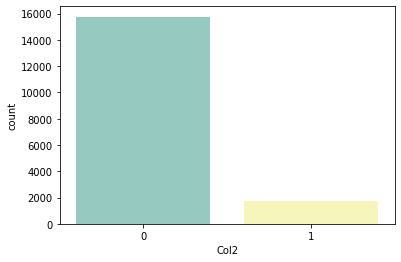

In [14]:
sns.countplot(train['Col2'], palette='Set3')

In [15]:
train['Col2'].value_counts()[1]/train['Col2'].value_counts().sum()

0.10050796187432225

In [7]:
data.head()

Col1  Col2          Col3          Col4          Col5          Col6  \
0    RIGHGSN   1.0  1.086711e+04  8.648345e+03  1.576618e+04  2.890466e+04   
1  RIMHI5ZGP   0.0  2.584312e+05  2.179633e+05  1.866287e+05  1.866287e+05   
2  RIHOG1SZU   0.0  1.459355e+07  1.260060e+07  1.100315e+07  1.010315e+07   
3  RIHOLMQWU   0.0  6.727043e+05  8.181116e+05  6.794893e+05  6.794893e+05   
4  RIHO584ET   0.0 -1.218742e+06 -3.005361e+06 -1.666241e+05 -2.403574e+06   

           Col7          Col8          Col9         Col10  ...  Col2388  \
0  5.273655e+03  2.346153e+04  1.285597e+04  2.871509e+04  ...        0   
1  2.154519e+05  1.923615e+05  1.726538e+05  1.666974e+05  ...        0   
2  1.879882e+07  1.514035e+07  5.320778e+06  6.906324e+06  ...        0   
3  8.257254e+05  7.605803e+05  3.577134e+05  4.236612e+05  ...        0   
4  2.583183e+06  2.086546e+06  5.938358e+06  5.446532e+06  ...        0   

   Col2389  Col2390  Col2391  Col2392  Col2393  Col2394  Col2395  Col2396  \
0        1        0        1    214.0    214.0     68.0     22.0     22.0   
1        0        0        0     41.0     41.0     38.0     12.0     12.0   
2        1        1        0    378.0    378.0    310.0     21.0     21.0   
3        0        0        0    702.0    702.0    644.0    951.0    951.0   
4        0        0        0   1305.0   1305.0   1211.0   2205.0   2205.0   

   Col2397  
0      7.0  
1     11.0  
2     16.0  
3    743.0  
4   1831.0  

[5 rows x 2395 columns]

#### The data is unbalanced with respect with target value.

<Figure size 432x288 with 0 Axes>

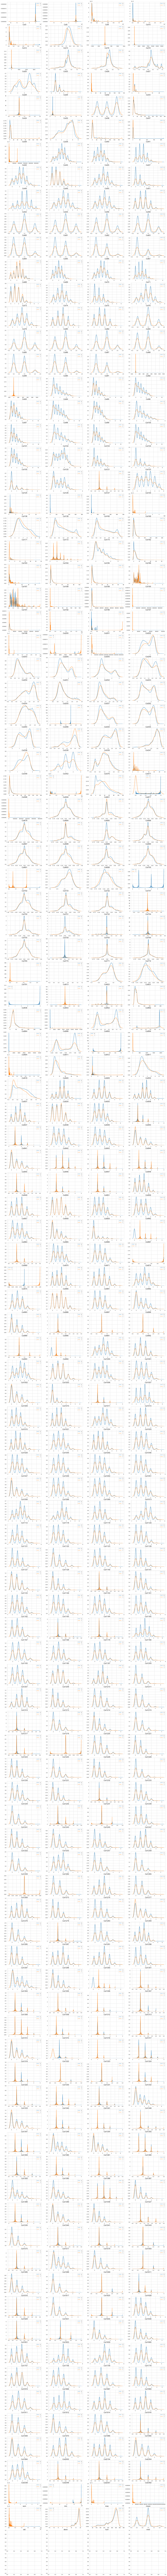

In [50]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrows=110, ncols=4,figsize=(24, nrows * 5))

    for feature in features:
        i += 1
        plt.subplot(110,4,i)
        sns.kdeplot(df1[feature], label=label1)
        sns.kdeplot(df2[feature], label=label2)
        
        plt.xlabel(feature, fontsize=15)
        locs, labels = plt.xticks()
        
        plt.tick_params(axis='x', which='major', labelsize=10)
        plt.tick_params(axis='y', which='major', labelsize=10)
    plt.show();

t0 = data.loc[data['Col2'] == 0]
t1 = data.loc[data['Col2'] == 1]
features = data.columns.values[2:]
plot_feature_distribution(t0, t1, '0', '1', features)

In [19]:
features = data.columns.values[:-3]
correlations = data[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
print(correlations.tail(50))

        level_0  level_1         0
104602   Col941  Col1169  0.895392
104603  Col1169   Col941  0.895392
104604  Col2154  Col1298  0.895560
104605  Col1298  Col2154  0.895560
104606  Col1278  Col1916  0.895581
104607  Col1916  Col1278  0.895581
104608  Col1707   Col959  0.895616
104609   Col959  Col1707  0.895616
104610  Col1354  Col1312  0.895629
104611  Col1312  Col1354  0.895629
104612  Col1911  Col1167  0.895686
104613  Col1167  Col1911  0.895686
104614    Col54    Col56  0.895922
104615    Col56    Col54  0.895922
104616   Col988  Col1284  0.896096
104617  Col1284   Col988  0.896096
104618  Col1380  Col2348  0.896160
104619  Col2348  Col1380  0.896160
104620   Col986  Col1262  0.896219
104621  Col1262   Col986  0.896219
104622  Col1164  Col1986  0.896904
104623  Col1986  Col1164  0.896904
104624   Col940  Col1324  0.897000
104625  Col1324   Col940  0.897000
104626   Col988  Col1994  0.897035
104627  Col1994   Col988  0.897035
104628  Col2336  Col1298  0.897204
104629  Col1298  Col

In [46]:
%%time
idx = features = data.columns.values[2:-1]
for df in [data]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

Wall time: 4.37 s


In [48]:
data[data.columns[426:]]

sum           min           max          mean           std  \
0      8.460280e+05 -2.811057e-01  6.247142e+05  2.286562e+03  3.285682e+04   
1      7.314512e+06 -2.309409e-01  5.282476e+06  2.026181e+04  2.811771e+05   
2      2.795535e+08 -3.476104e-01  2.226136e+08  7.434933e+05  1.153767e+07   
3      3.153130e+07 -7.750000e+00  2.821560e+07  8.499002e+04  1.465936e+06   
4      5.396484e+08 -1.218742e+06  4.726991e+08  1.427641e+06  2.438535e+07   
5      3.596742e+07 -1.216820e+00  2.223230e+07  1.007491e+05  1.216418e+06   
6      5.043679e+05 -1.575552e-01  1.826950e+05  1.374300e+03  1.258592e+04   
7      1.372935e+06 -2.834734e-01  6.740280e+05  3.824330e+03  4.007846e+04   
8      9.699880e+04 -3.240000e+00  4.708150e+04  2.628694e+02  2.766412e+03   
9      9.415980e+05 -7.985965e-02  6.225380e+05  2.531177e+03  3.309263e+04   
10     4.093204e+05 -3.414163e-01  1.769498e+05  1.121426e+03  1.079895e+04   
11     1.664248e+05 -1.557274e-01  9.036444e+04  4.559584e+02  4.950648e+03   
12     3.743276e+05 -5.269010e-01  3.207825e+05  9.902846e+02  1.652162e+04   
13     5.832542e+06 -2.663667e+01  4.390463e+06  1.480341e+04  2.246032e+05   
14     6.897449e+05 -3.111746e-01  2.531668e+05  1.874307e+03  1.851198e+04   
15     3.253028e+05 -2.023439e-01  1.341536e+05  8.961511e+02  8.270059e+03   
16     6.486947e+05 -3.661377e-01  4.048880e+05  1.772390e+03  2.175020e+04   
17     2.374690e+06 -4.279466e-01  1.791596e+06  6.435475e+03  9.471612e+04   
18     3.508592e+05 -2.668635e-01  2.171314e+05  9.066129e+02  1.134237e+04   
19     1.677623e+05  0.000000e+00  8.608700e+04  4.793207e+02  4.914598e+03   
20     2.741243e+05 -2.412500e+01  1.762380e+05  7.449029e+02  9.447102e+03   
21     6.649649e+05 -4.239190e-01  5.630979e+05  1.727182e+03  2.874812e+04   
22     5.203745e+05 -4.805000e+00  3.935580e+05  1.417914e+03  2.070504e+04   
23     3.932447e+05 -4.385637e-01  2.568273e+05  1.071511e+03  1.367398e+04   
24     1.578845e+05 -9.997240e-01  8.933700e+04  4.373532e+02  4.912364e+03   
25     9.877946e+04 -7.555230e-01  7.228200e+04  2.751517e+02  3.880913e+03   
26     5.665191e+05 -2.099563e-01  2.914145e+05  1.506700e+03  1.626188e+04   
27     7.840465e+05 -4.638000e+01  4.704690e+05  2.130561e+03  2.548665e+04   
28     2.472626e+05 -3.500000e+00  1.374239e+05  6.524078e+02  7.394147e+03   
29     3.184221e+05 -4.963045e-01  1.346442e+05  8.796190e+02  8.275382e+03   
...             ...           ...           ...           ...           ...   
37933  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37934  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37935  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37936  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37937  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37938  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37939  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37940  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37941  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37942  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37943  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37944  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37945  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37946  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37947  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37948  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37949  8.000000e+00  0.000000e+00  4.000000e+00  2.272727e-02  2.376175e-01   
37950  5.983381e+05 -2.956252e-01  2.356440e+05  1.608436e+03  1.497645e+04   
37951  2.679161e+05 -4.932000e+01  1.343790e+05  7.163532e+02  7.5

<Figure size 432x288 with 0 Axes>

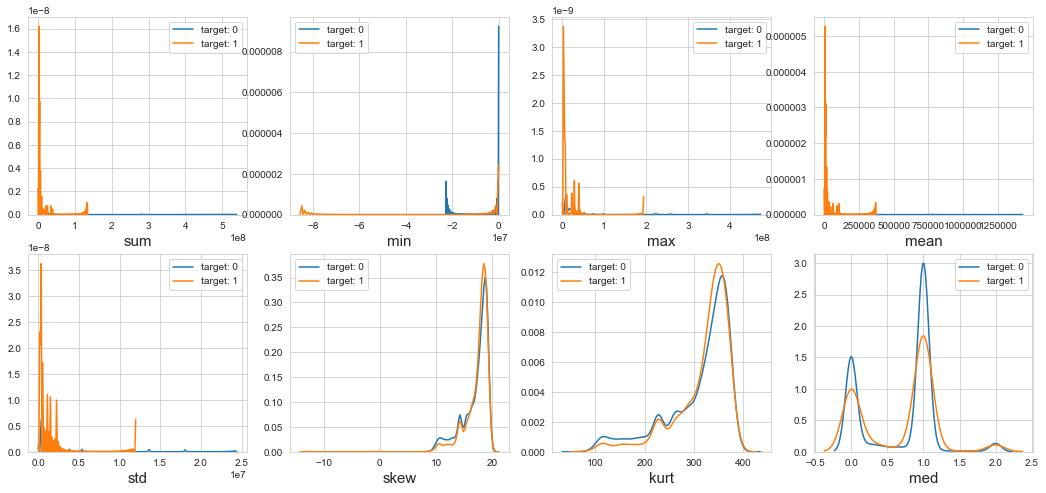

In [49]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature],label=label1)
        sns.kdeplot(df2[feature],label=label2)
        plt.xlabel(feature, fontsize=15)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=10)
        plt.tick_params(axis='y', which='major', labelsize=10)
    plt.show();


t0 = data.loc[data['Col2'] == 0]
t1 = data.loc[data['Col2'] == 1]
features = data.columns.values[426:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

In [55]:
test1 = data.drop(['Col1'], axis=1).values

unique_count = np.zeros_like(test1)

for feature in range(test1.shape[1]):
    _, index, count = np.unique(test1[:, feature], return_counts=True, return_index=True)
    unique_count[index[count == 1], feature] += 1
    
real_samples = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synth_samples = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print('Number of real samples in test set is {}'.format(len(real_samples)))
print('Number of synthetic samples in test set is {}'.format(len(synth_samples)))

Number of real samples in test set is 36767
Number of synthetic samples in test set is 1196


In [65]:
features = data.columns.values[:-3]

for feature in features:
    temp = data[feature].value_counts(dropna=True)

    data[feature + 'vc'] = data[feature].map(temp).map(lambda x: min(10, x)).astype(np.uint8)

    data[feature + 'sum'] = ((data[feature] - data[feature].mean()) * data[feature + 'vc'].map(lambda x: int(x > 1))).astype(np.float32)
    
    data[feature + 'sum2'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 2))).astype(np.float32)

    data[feature + 'sum3'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 4))).astype(np.float32) 
    
print('Data set shape after creating magic features: {}'.format(data.shape))

Data set shape after creating magic features: (37963, 1623)


In [66]:
data

Col3          Col5          Col9         Col10         Col12  \
0      1.086711e+04  1.576618e+04  1.285597e+04  2.871509e+04  3.043078e+04   
1      2.584312e+05  1.866287e+05  1.726538e+05  1.666974e+05  1.859404e+05   
2      1.459355e+07  1.100315e+07  5.320778e+06  6.906324e+06  1.113330e+07   
3      6.727043e+05  6.794893e+05  3.577134e+05  4.236612e+05  4.065539e+05   
4     -1.218742e+06 -1.666241e+05  5.938358e+06  5.446532e+06  3.262168e+06   
5      3.911176e+06  2.995007e+06  1.610207e+06  2.116667e+06  1.536280e+06   
6      1.173942e+05  8.499665e+04  3.618990e+04  3.618990e+04  4.065046e+04   
7      2.582386e+05  2.104294e+05  9.263240e+04  5.521743e+04  2.315825e+04   
8      1.463930e+04  1.928101e+04  2.573648e+03  2.380503e+03  3.849697e+03   
9      8.405841e+04  3.268636e+04  5.293322e+04  5.889939e+04  8.180899e+04   
10     8.331730e+04  3.469404e+04  3.742235e+04  2.776126e+04  3.452649e+04   
11     1.541710e+04  9.306876e+03  8.714554e+03  9.081942e+03  8.594494e+03   
12     6.348547e+03  5.193540e+03  4.258912e+03  4.198301e+03  9.595670e+03   
13     8.258002e+04  7.473273e+05  1.056434e+05  1.056434e+05  1.098837e+05   
14     1.817353e+05  1.623718e+05  5.677918e+04  1.306716e+04  1.111430e+04   
15     5.978746e+04  3.385664e+04  2.701616e+04  2.894295e+04  2.626369e+04   
16     5.933678e+04  4.345385e+04  1.501514e+04  1.501514e+04  1.512730e+04   
17     7.617332e+04  6.271249e+04  5.382220e+04  3.736789e+04  3.130311e+04   
18     3.962194e+04  1.232196e+04  1.738504e+04  1.736988e+04  1.791650e+04   
19     2.054298e+04  1.541046e+04  7.875412e+03  1.122931e+04  1.049779e+04   
20     4.709353e+03  5.943383e+03  6.490472e+03  6.494343e+03  2.382137e+04   
21     2.150393e+04  5.956842e+03  1.342027e+04  1.627142e+04  1.604680e+04   
22     2.257172e+04  2.476025e+04  1.725873e+04  1.725873e+04  3.045674e+04   
23     3.677736e+04  2.485438e+04  1.064013e+04  1.342630e+04  1.010641e+04   
24     8.498837e+03  5.319682e+03  4.287156e+03  4.287156e+03  1.340210e+04   
25     1.808683e+03  1.316346e+03  3.194729e+02  7.185338e+02  6.802036e+03   
26     8.269657e+04  6.596684e+04  3.280842e+04  3.280842e+04  4.078217e+04   
27     5.852857e+04  7.845355e+04  6.211816e+04  6.257675e+04  3.509820e+04   
28     2.627332e+04  2.497956e+04  1.275563e+04  1.231074e+04  1.473393e+04   
29     5.653535e+04  4.778131e+04  7.854841e+03  1.385569e+04  2.456822e+04   
...             ...           ...           ...           ...           ...   
37933  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37934  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37935  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37936  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37937  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37938  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37939  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37940  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37941  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37942  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37943  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37944  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37945  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37946  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37947  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37948  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37949  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
37950  1.148784e+05  9.215586e+04  4.228735e+04  5.633197e+04  4.422489e+04   
37951  2.160354e+04  2.830621e+04  2.489728e+04  2.550732e+04  2.

In [9]:
train1=data[~data['Col2'].isnull()]
train_x=data[~data['Col2'].isnull()]
train_y=train1['Col2']
test1=data[data['Col2'].isnull()]
# test1=test1[~test1['shot_id_number'].isnull()]
test_x=data[data['Col2'].isnull()]
# test_x=test_x[~test_x['shot_id_number'].isnull()]

del train_x['Col2']
del train_x['Col1']
del test_x['Col2']
del test_x['Col1']
# del train1['Col2']
# del train1['Col1']

In [41]:
from imblearn.over_sampling import ADASYN 
sm = ADASYN(n_jobs=-1)
train_x, train_y = sm.fit_sample(train_x, train_y)
train_x = pd.DataFrame(train_x, columns = train1.columns)
train_y=pd.DataFrame(train_y)

# Bayes Search

In [ ]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'min_child_weight': (0, 50,),
        'max_depth': (3, 10),
        'subsample': (0.3, 1.0),
        'colsample_bytree': (0.3, 1.0),
        'reg_lambda':(1e-5,100,'log-uniform'),
        'reg_alpha':(1e-5,100,'log-uniform'),
        'learning_rate':(0.01,0.2,'log-uniform'),
        'gamma':(0.001,10),
        'n_estimators':(100,1000),
        }


class FixedBayesSearchCV(BayesSearchCV):

  def __init__(self, estimator, search_spaces, optimizer_kwargs=None,
            n_iter=10, scoring=None, fit_params=None, n_jobs=-1,
            n_points=1, iid=True, refit=True, cv=None, verbose=2,
            pre_dispatch='2*n_jobs', random_state=None,
            error_score='raise', return_train_score=False):
    """
    See: https://github.com/scikit-optimize/scikit-optimize/issues/762#issuecomment-493689266
    """

    # Bug fix: Added this line
    self.fit_params = fit_params

    self.search_spaces = search_spaces
    self.n_iter = n_iter
    self.n_points = n_points
    self.random_state = random_state
    self.optimizer_kwargs = optimizer_kwargs
    self._check_search_space(self.search_spaces)

    # Removed the passing of fit_params to the parent class.
    super(BayesSearchCV, self).__init__(
            estimator=estimator, scoring=scoring, n_jobs=n_jobs, iid=iid,
            refit=refit, cv=cv, verbose=verbose, pre_dispatch=pre_dispatch,
            error_score=error_score, return_train_score=return_train_score)

def _run_search(self, x):
    raise BaseException('Use newer skopt')



bayes=FixedBayesSearchCV(xgb.XGBClassifier(objective = "binary:logistic"),params,n_iter=10,scoring='f1',cv=5,random_state=42,n_jobs=-1)
res=bayes.fit(train_x,train_y)
print(res.best_params_)
print(res.best_estimator_)

# Random Search

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from datetime import datetime

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.3,0.4,0.5,0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.01, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1995)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=skf.split(train_x,train_y), verbose=3, random_state=1995 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(train_x,train_y)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)

In [ ]:
modelxgb =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=5,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=-1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=3)
modelxgb.fit(X_train , y_train)
predxgb = modelxgb.predict(X_valid)
predxgb1=modelxgb.predict(test_x)

In [ ]:
from sklearn.metrics import classification_report
print(f1_score(predxgb,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predxgb,y_valid))

# XGBoost - Early stopping

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)

In [34]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
m=XGBClassifier(n_estimators=3000,base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.30254121507832027,
              learning_rate=0.11588344218319326,
              max_delta_step=0, max_depth=8, min_child_weight=13, missing=None,
              n_jobs=-1,objective='binary:logistic', random_state=0,
              reg_alpha=0.11236999294535673, reg_lambda=0.0008375368839458805,
              scale_pos_weight=1, seed=None, silent=None,
              subsample=0.5189875143642397, verbosity=1)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_valid)
p3=m.predict(test_x)

[0]	validation_0-error:0.100528	validation_1-error:0.100428
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.082834	validation_1-error:0.103281
Stopping. Best iteration:
[47]	validation_0-error:0.09218	validation_1-error:0.09786



In [35]:
from sklearn.metrics import classification_report
print(f1_score(p2,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(p2,y_valid))

0.08042895442359249
[[3147  337]
 [   6   15]]


In [80]:
final=pd.DataFrame()
final['Col1'] = test['Col1']
final['Col2'] =p3
final.to_csv('krishna_priya_prediction_xgb_new.csv', index=False)

In [122]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# train_x = sc_X.fit_transform(train_x)
# test_x = sc_X.transform(test_x)

# Catboost

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)

In [46]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]
categorical_features_indices

array([], dtype=int64)

In [47]:
import catboost

class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=5, seed=1995, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values
    
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        verbose=100,
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [48]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 980ms	remaining: 1h 5m 19s
100:	learn: 0.1233230	test: 0.0688802	best: 0.0689292 (99)	total: 1m 11s	remaining: 46m 7s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.02s	remaining: 1h 8m 5s
100:	learn: 0.4676745	test: 0.1545199	best: 0.1640172 (96)	total: 1m 21s	remaining: 52m 16s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0017702	test: 0.0000000	best: 0.0000000 (0)	total: 6.27s	remaining: 6h 57m 55s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 834ms	remaining: 55m 33s
Stopped by overfitting detector  (30 iterations wait)


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	learn: 0.0017702	test: 0.0000000	best: 0.0000000 (0)	total: 5.79s	remaining: 6h 26m 17s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0017702	test: 0.0000000	best: 0.0000000 (0)	total: 5.98s	remaining: 6h 38m 46s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 1.04s	remaining: 1h 9m 37s
100:	learn: 0.3901140	test: 0.1263900	best: 0.1386628 (72)	total: 1m 19s	remaining: 51m 26s
Stopped by overfitting detector  (30 iterations wait)


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 924ms	remaining: 1h 1m 33s
100:	learn: 0.3901140	test: 0.1263900	best: 0.1386628 (72)	total: 1m 17s	remaining: 49m 35s
Stopped by overfitting detector  (30 iterations wait)


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 870ms	remaining: 57m 59s
100:	learn: 0.3901140	test: 0.1263900	best: 0.1386628 (72)	total: 1m 9s	remaining: 44m 46s
Stopped by overfitting detector  (30 iterations wait)
0:	learn: 0.0017702	test: 0.0000000	best: 0.0000000 (0)	total: 6.04s	remaining: 6h 42m 17s
Stopped by overfitting detector  (30 iterations wait)
optimal_parameters: {'learning_rate': 0.7993751032106784, 'depth': 10}
optimal score: 0.9618037652735946
optimization time: 2377.5321485996246
updating model with optimal values


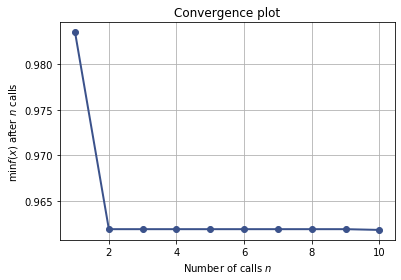

In [102]:
cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         loss_function='Logloss',
                         eval_metric='F1',
                         boosting_type='Ordered', # use permutations
                         random_seed=10, 
                         use_best_model=True)
cb_optimizer = CatboostOptimizer(cb, X_train, y_train,categorical_columns_indices=categorical_features_indices)
params_space = [Real(0.01, 0.8, name='learning_rate'),
                Integer(4, 16, name='depth')
               ]
cb_optimal_values = cb_optimizer.optimize(params_space)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
m=CatBoostClassifier(n_estimators=3000,random_state=10,eval_metric='F1',max_depth=10,learning_rate=0.7993751032106784,od_wait=50
                     ,l2_leaf_reg=10,cat_features=categorical_features_indices,bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid, y_valid)], early_stopping_rounds=100,verbose=100)
p2=m.predict(X_valid)
p3=m.predict(test_x)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(p2,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(p2,y_valid))

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94      3416
         1.0       0.11      0.43      0.17        89

   micro avg       0.90      0.90      0.90      3505
   macro avg       0.55      0.67      0.56      3505
weighted avg       0.96      0.90      0.92      3505

[[3102  314]
 [  51   38]]


In [122]:
final=pd.DataFrame()
final['Col1'] = test['Col1']
final['Col2'] =p3
final.to_csv('krishna_priya_prediction_cb.csv', index=False)

In [129]:
# sum(m.feature_importances_==0.0)

# ft_imp=m.feature_importances_
# tocol_noimpor=np.empty(0)
# for i in range(len(train_x.columns)):
#     if ft_imp[i]==0:
#         tocol_noimpor=np.append(tocol_noimpor,[train_x.columns[i]])
        
# list(tocol_noimpor)
# train_x=train_x.drop(list(tocol_noimpor),axis=1)
# test_x=test_x.drop(list(tocol_noimpor),axis=1)

# Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=None,
           max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=573869792, verbose=2, warm_start=False,class_weight="balanced")
modelrf.fit(X_train,y_train)
predrf=modelrf.predict(X_valid)
predrf1=modelrf.predict(test_x)
from sklearn.metrics import classification_report
print(f1_score(predrf,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predrf,y_valid))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 500building tree 2 of 500building tree 3 of 500building tree 4 of 500



building tree 5 of 500building tree 6 of 500

building tree 7 of 500
building tree 8 of 500
building tree 9 of 500building tree 10 of 500

building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.6s


building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500building tree 52 of 500

building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    6.5s



building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500building tree 165 of 500

building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   15.3s


building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500building tree 369 of 500

building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   22.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.4s finished


0.08588957055214724
[[3037  331]
 [ 116   21]]


# Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
modelada = AdaBoostClassifier(random_state=1,n_estimators=1000,learning_rate=1)
modelada.fit(X_train,y_train)
predada=modelada.predict(X_valid)
predada1=modelada.predict(test_x)
from sklearn.metrics import classification_report
print(f1_score(predada,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predada,y_valid))

0.1471264367816092
[[3102  320]
 [  51   32]]


# Gbbost

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier(learning_rate=0.1, max_depth=5, max_features=0.6500000000000001, min_samples_leaf=10, min_samples_split=2, n_estimators=100, subsample=0.6000000000000001)
modelgb.fit(X_train,y_train)
predgb=modelgb.predict(X_valid)
predgb1=modelgb.predict(test_x)
from sklearn.metrics import classification_report
print(f1_score(predgb,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predgb,y_valid))

0.1411192214111922
[[3123  323]
 [  30   29]]


In [71]:
final=pd.DataFrame()
final['Col1'] = test['Col1']
final['Col2'] =predgb1
final.to_csv('krishna_priya_prediction_gb.csv', index=False)

In [75]:
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(random_state=1,
                         learning_rate=0.001,
                         n_estimators=450,
                         n_jobs=-1, 
                         eta = 0.1,
                         min_child_weight=9,
                         max_depth = 9,
                         gamma=2,
                         subsample = 0.8,
                         colsample_bytree = 1,
                         colsample_bynode=1,
                         colsample_bylevel=1,
                         reg_lambda= 1,
                         reg_alpha=1,
                         scale_pos_weight=1,
                         num_boost_round = 260,
                         early_stopping_rounds = 260,
                         booster = "gbtree",
                         seed= 0,
                         objective= "binary:logistic",
                        )
modelxgb.fit(X_train, y_train)
predxgb = modelxgb.predict(X_valid)
predxgb1=modelxgb.predict(test_x)
from sklearn.metrics import classification_report
print(f1_score(predgb,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predgb,y_valid))

0.1411192214111922
[[3123  323]
 [  30   29]]


In [73]:
from sklearn.ensemble import VotingClassifier
modeleclf = VotingClassifier(estimators=[('rf', modelrf),('ada', modelada), ('gb', modelgb), ('xgb', modelxgb)],voting='hard',n_jobs=-1)
modeleclf.fit(X_train, y_train)
predeclf = modeleclf.predict(X_valid)
predeclf1=modeleclf.predict(test_x)
from sklearn.metrics import classification_report
print(f1_score(predgb,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predgb,y_valid))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.3s finished


0.1411192214111922
[[3123  323]
 [  30   29]]


In [76]:
final=pd.DataFrame()
final['Col1'] = test['Col1']
final['Col2'] =predeclf1
final.to_csv('krishna_priya_prediction_ensemble.csv', index=False)

# Hyperopt

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)

In [74]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
param_hyperopt= {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1)),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 50, 1)),
    'gamma':scope.int(hp.quniform('gamma', 0, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 100, 3000, 20)),
    'boosting_type': hp.choice('boosting_type', ['gbtree', 'dart']),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.01, 1),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.01, 1),
    'subsample': hp.uniform('subsample', 0.01, 1),
    'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-5), np.log(100)),
    'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-5), np.log(100)),
    'min_child_weight': scope.int(hp.quniform('min_child_weight', 0, 50, 1)),
    'max_delta_step': scope.int(hp.quniform('max_delta_step', 0, 20, 1)),
    'scale_pos_weight': hp.loguniform('scale_pos_weight', np.log(1e-5), np.log(100))
}

In [75]:
import xgboost
from xgboost import XGBClassifier
import time
from sklearn.model_selection import cross_val_score
def hyperopt(param_space, X_train, y_train, X_test, y_test, num_eval):
    
    start = time.time()
    
    def objective_function(params):
        clf = XGBClassifier(**params,nthread=-1,n_jobs=-1,verbose=2)
        score = cross_val_score(clf, X_train, y_train, cv=10,scoring='f1_weighted').mean()
        return {'loss': -score, 'status': STATUS_OK}

    trials = Trials()
    best_param = fmin(objective_function, 
                      param_space, 
                      algo=tpe.suggest, 
                      max_evals=num_eval, 
                      trials=trials,
                      rstate= np.random.RandomState(1))
    loss = [x['result']['loss'] for x in trials.trials]
    
    best_param_values = [x for x in best_param.values()]
    
    if best_param_values[0] == 0:
        boosting_type = 'gbtree'
    else:
        boosting_type= 'dart'
    
    clf_best = XGBClassifier(learning_rate=best_param_values[3],
                                  colsample_bytree=int(best_param_values[1]),
                                  max_depth=int(best_param_values[4]),
                                  n_estimators=int(best_param_values[5]),
                                  boosting_type=boosting_type,
                                  gamma=best_param_values[2],
                                  reg_lambda=best_param_values[6],
                                  colsample_bylevel=best_param_values[9],
                                  subsample=best_param_values[10],
                                  reg_alpha=best_param_values[11],
                                  min_child_weight=int(best_param_values[7]),
                                  max_delta_step=int(best_param_values[8]),
                                  scale_pos_weight=best_param_values[12],
                                  nthread=-1,n_jobs=-1,verbose=2
                                 )
                                  
    clf_best.fit(X_train, y_train)
    
    print("")
    print("##### Results")
    print("Score best parameters: ", min(loss)*-1)
    print("Best parameters: ", best_param)
    print("Test Score: ", clf_best.score(X_test, y_test))
    print("Time elapsed: ", time.time() - start)
    print("Parameter combinations evaluated: ", num_eval)
    
    return trials

In [28]:
num_eval=12
results_hyperopt = hyperopt(param_hyperopt,X_train,y_train,X_valid,y_valid, num_eval)

  0%|          | 0/12 [00:00<?, ?it/s, best loss: ?]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



  8%|▊         | 1/12 [04:49<53:08, 289.88s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 17%|█▋        | 2/12 [07:43<42:29, 254.92s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 25%|██▌       | 3/12 [10:03<33:05, 220.58s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 33%|███▎      | 4/12 [13:18<28:22, 212.79s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 42%|████▏     | 5/12 [15:40<22:21, 191.71s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 50%|█████     | 6/12 [17:59<17:35, 175.89s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 58%|█████▊    | 7/12 [1:48:35<2:26:09, 1753.81s/it, best loss: -0.8518683217968137]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 75%|███████▌  | 9/12 [1:59:10<51:48, 1036.20s/it, best loss: -0.8623574292652251]  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 83%|████████▎ | 10/12 [2:01:37<25:38, 769.38s/it, best loss: -0.8623574292652251]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 92%|█████████▏| 11/12 [2:05:50<10:14, 614.47s/it, best loss: -0.8623574292652251]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



100%|██████████| 12/12 [2:11:44<00:00, 536.35s/it, best loss: -0.8623574292652251]

##### Results
Score best parameters:  0.8623574292652251
Best parameters:  {'boosting_type': 0, 'colsample_by_tree': 0.04194953610571695, 'colsample_bylevel': 0.8338558194842367, 'gamma': 11.0, 'learning_rate': 0.018323530487701616, 'max_delta_step': 0.0, 'max_depth': 26.0, 'min_child_weight': 2.0, 'n_estimators': 1940.0, 'reg_alpha': 0.06630670566664576, 'reg_lambda': 5.959950481376356, 'scale_pos_weight': 1.4864691366074312, 'subsample': 0.3229839984555949}
Test Score:  0.8995720399429387
Time elapsed:  7904.6534242630005
Parameter combinations evaluated:  12


In [13]:
%%time
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(random_state=1,
                         n_jobs=-1,
                         n_thread=-1,
                         boosting_type="gbtree",
                         colsample_by_tree= 0.04194953610571695,
                         colsample_bylevel= 0.8338558194842367,
                         gamma= 11,
                         learning_rate= 0.018323530487701616,
                         max_delta_step= 0, 
                         max_depth= 26,
                         min_child_weight= 2,
                         n_estimators= 1940,
                         reg_alpha= 0.06630670566664576,
                         reg_lambda= 5.959950481376356,
                         scale_pos_weight= 1.4864691366074312, 
                         subsample= 0.3229839984555949,
                         objective= "binary:logistic",
                         verbosity=2
                        )
modelxgb.fit(X_train, y_train)
predxgb = modelxgb.predict(X_valid)
predxgb1=modelxgb.predict(test_x)
from sklearn.metrics import f1_score
print(f1_score(predxgb,y_valid))
from sklearn.metrics import classification_report
print(classification_report(predxgb,y_valid))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predxgb,y_valid))

[16:28:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 94 pruned nodes, max_depth=5
[16:28:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 104 pruned nodes, max_depth=3
[16:28:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 128 pruned nodes, max_depth=4
[16:28:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 110 pruned nodes, max_depth=10
[16:28:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 132 pruned nodes, max_depth=5
[16:28:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 118 pruned nodes, max_depth=3
[16:29:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 136 pruned nodes, max_depth=5
[16:29:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 166 pruned nodes, max_depth=6
[16:29:24] INFO: src/tree/updater_prune.c

[16:41:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 250 pruned nodes, max_depth=5
[16:41:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 254 pruned nodes, max_depth=7
[16:41:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 196 pruned nodes, max_depth=8
[16:41:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 206 pruned nodes, max_depth=5
[16:41:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 194 pruned nodes, max_depth=17
[16:42:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 220 pruned nodes, max_depth=7
[16:42:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 272 pruned nodes, max_depth=5
[16:42:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 212 pruned nodes, max_depth=6
[16:42:43] INFO: src/tree/updater_prune

[16:53:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 184 pruned nodes, max_depth=14
[16:53:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 208 pruned nodes, max_depth=13
[16:53:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 202 pruned nodes, max_depth=11
[16:54:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 204 pruned nodes, max_depth=12
[16:54:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 214 pruned nodes, max_depth=14
[16:54:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 208 pruned nodes, max_depth=9
[16:54:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 186 pruned nodes, max_depth=12
[16:54:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 220 pruned nodes, max_depth=9
[16:54:47] INFO: src/tree/updater_

[17:01:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 174 pruned nodes, max_depth=16
[17:01:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 176 pruned nodes, max_depth=15
[17:01:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 194 pruned nodes, max_depth=7
[17:01:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 176 pruned nodes, max_depth=9
[17:01:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 188 pruned nodes, max_depth=9
[17:01:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 204 pruned nodes, max_depth=8
[17:01:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 204 pruned nodes, max_depth=8
[17:01:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 184 pruned nodes, max_depth=7
[17:02:00] INFO: src/tree/updater_prun

[17:07:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 188 pruned nodes, max_depth=10
[17:07:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 166 pruned nodes, max_depth=15
[17:07:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 188 pruned nodes, max_depth=7
[17:07:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 206 pruned nodes, max_depth=6
[17:07:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 166 pruned nodes, max_depth=10
[17:07:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 180 pruned nodes, max_depth=7
[17:08:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 164 pruned nodes, max_depth=8
[17:08:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 176 pruned nodes, max_depth=9
[17:08:12] INFO: src/tree/updater_pru

[17:13:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 178 pruned nodes, max_depth=8
[17:13:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 172 pruned nodes, max_depth=9
[17:13:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 196 pruned nodes, max_depth=11
[17:13:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 182 pruned nodes, max_depth=8
[17:13:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 188 pruned nodes, max_depth=9
[17:13:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 180 pruned nodes, max_depth=8
[17:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 178 pruned nodes, max_depth=8
[17:14:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 196 pruned nodes, max_depth=6
[17:14:07] INFO: src/tree/updater_prune

[17:19:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 204 pruned nodes, max_depth=13
[17:19:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 190 pruned nodes, max_depth=12
[17:19:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 188 pruned nodes, max_depth=10
[17:19:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 194 pruned nodes, max_depth=7
[17:19:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 194 pruned nodes, max_depth=10
[17:19:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 194 pruned nodes, max_depth=7
[17:20:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 186 pruned nodes, max_depth=7
[17:20:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 188 pruned nodes, max_depth=10
[17:20:13] INFO: src/tree/updater_p

[17:25:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 196 pruned nodes, max_depth=8
[17:25:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 196 pruned nodes, max_depth=7
[17:25:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 194 pruned nodes, max_depth=8
[17:25:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 180 pruned nodes, max_depth=8
[17:25:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 190 pruned nodes, max_depth=7
[17:25:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 208 pruned nodes, max_depth=5
[17:26:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 174 pruned nodes, max_depth=10
[17:26:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 196 pruned nodes, max_depth=7
[17:26:11] INFO: src/tree/updater_prune

[17:31:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 192 pruned nodes, max_depth=6
[17:31:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 214 pruned nodes, max_depth=5
[17:31:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 206 pruned nodes, max_depth=9
[17:31:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 192 pruned nodes, max_depth=10
[17:31:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 194 pruned nodes, max_depth=8
[17:32:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 200 pruned nodes, max_depth=6
[17:32:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 194 pruned nodes, max_depth=6
[17:32:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 200 pruned nodes, max_depth=6
[17:32:19] INFO: src/tree/updater_prune

[17:39:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 198 pruned nodes, max_depth=10
[17:39:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 178 pruned nodes, max_depth=8
[17:39:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 196 pruned nodes, max_depth=7
[17:39:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 214 pruned nodes, max_depth=6
[17:39:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 194 pruned nodes, max_depth=8
[17:40:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 194 pruned nodes, max_depth=5
[17:40:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 186 pruned nodes, max_depth=7
[17:40:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 172 pruned nodes, max_depth=13
[17:40:28] INFO: src/tree/updater_prun

[17:49:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 196 pruned nodes, max_depth=8
[17:50:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 188 pruned nodes, max_depth=10
[17:50:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 194 pruned nodes, max_depth=5
[17:50:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 214 pruned nodes, max_depth=5
[17:50:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 208 pruned nodes, max_depth=8
[17:50:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 184 pruned nodes, max_depth=8
[17:50:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 208 pruned nodes, max_depth=6
[17:50:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 206 pruned nodes, max_depth=4
[17:51:08] INFO: src/tree/updater_prune

[17:59:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 216 pruned nodes, max_depth=5
[17:59:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 204 pruned nodes, max_depth=6
[17:59:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 210 pruned nodes, max_depth=12
[17:59:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 206 pruned nodes, max_depth=7
[17:59:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 220 pruned nodes, max_depth=0
[17:59:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 204 pruned nodes, max_depth=3
[17:59:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 194 pruned nodes, max_depth=8
[17:59:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 214 pruned nodes, max_depth=0
[17:59:58] INFO: src/tree/updater_prune.c

[18:06:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 204 pruned nodes, max_depth=8
[18:06:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 218 pruned nodes, max_depth=3
[18:06:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 190 pruned nodes, max_depth=8
[18:07:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 218 pruned nodes, max_depth=3
[18:07:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 216 pruned nodes, max_depth=4
[18:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 206 pruned nodes, max_depth=4
[18:07:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 202 pruned nodes, max_depth=4
[18:07:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 212 pruned nodes, max_depth=7
[18:07:37] INFO: src/tree/updater_prune.cc:74

[18:14:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 212 pruned nodes, max_depth=7
[18:15:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 232 pruned nodes, max_depth=1
[18:15:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 222 pruned nodes, max_depth=2
[18:15:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 188 pruned nodes, max_depth=12
[18:15:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 206 pruned nodes, max_depth=8
[18:15:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 208 pruned nodes, max_depth=9
[18:15:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 206 pruned nodes, max_depth=4
[18:15:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 220 pruned nodes, max_depth=1
[18:15:55] INFO: src/tree/updater_prune.cc:

[18:23:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[18:23:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 186 pruned nodes, max_depth=6
[18:23:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 222 pruned nodes, max_depth=4
[18:23:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 212 pruned nodes, max_depth=6
[18:23:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 204 pruned nodes, max_depth=3
[18:23:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 228 pruned nodes, max_depth=0
[18:23:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 224 pruned nodes, max_depth=4
[18:24:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 210 pruned nodes, max_depth=3
[18:24:07] INFO: src/tree/updater_prune.cc:74

[18:31:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 228 pruned nodes, max_depth=1
[18:31:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 222 pruned nodes, max_depth=6
[18:31:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 210 pruned nodes, max_depth=6
[18:31:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 230 pruned nodes, max_depth=4
[18:31:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 196 pruned nodes, max_depth=7
[18:31:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 210 pruned nodes, max_depth=7
[18:31:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 202 pruned nodes, max_depth=6
[18:32:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 188 pruned nodes, max_depth=11
[18:32:09] INFO: src/tree/updater_prune.c

[18:39:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 212 pruned nodes, max_depth=6
[18:39:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 212 pruned nodes, max_depth=5
[18:39:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 206 pruned nodes, max_depth=2
[18:39:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 212 pruned nodes, max_depth=6
[18:39:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 218 pruned nodes, max_depth=5
[18:39:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 218 pruned nodes, max_depth=2
[18:39:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 194 pruned nodes, max_depth=11
[18:40:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 200 pruned nodes, max_depth=7
[18:40:12] INFO: src/tree/updater_prune.c

[18:47:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 202 pruned nodes, max_depth=2
[18:47:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 218 pruned nodes, max_depth=4
[18:47:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 202 pruned nodes, max_depth=4
[18:47:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 210 pruned nodes, max_depth=2
[18:47:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 196 pruned nodes, max_depth=5
[18:47:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 204 pruned nodes, max_depth=4
[18:48:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 196 pruned nodes, max_depth=9
[18:48:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 208 pruned nodes, max_depth=6
[18:48:14] INFO: src/tree/updater_prune.cc:74

[18:55:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 220 pruned nodes, max_depth=7
[18:55:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 198 pruned nodes, max_depth=6
[18:55:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 210 pruned nodes, max_depth=2
[18:55:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 220 pruned nodes, max_depth=0
[18:55:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 220 pruned nodes, max_depth=1
[18:55:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 212 pruned nodes, max_depth=8
[18:56:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 200 pruned nodes, max_depth=7
[18:56:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 208 pruned nodes, max_depth=2
[18:56:15] INFO: src/tree/updater_prune.cc:7

[19:03:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 200 pruned nodes, max_depth=4
[19:03:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 228 pruned nodes, max_depth=0
[19:03:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 206 pruned nodes, max_depth=5
[19:03:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 216 pruned nodes, max_depth=0
[19:03:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 188 pruned nodes, max_depth=3
[19:04:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[19:04:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 208 pruned nodes, max_depth=0
[19:04:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 224 pruned nodes, max_depth=0
[19:04:23] INFO: src/tree/updater_prune.cc:74:

[19:11:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 194 pruned nodes, max_depth=5
[19:11:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 188 pruned nodes, max_depth=7
[19:11:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 230 pruned nodes, max_depth=0
[19:11:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 214 pruned nodes, max_depth=3
[19:12:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 206 pruned nodes, max_depth=2
[19:12:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 204 pruned nodes, max_depth=6
[19:12:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 204 pruned nodes, max_depth=6
[19:12:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 236 pruned nodes, max_depth=0
[19:12:28] INFO: src/tree/updater_prune.cc:7

[19:19:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 204 pruned nodes, max_depth=0
[19:19:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 208 pruned nodes, max_depth=6
[19:19:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 208 pruned nodes, max_depth=4
[19:20:02] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 216 pruned nodes, max_depth=5
[19:20:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 208 pruned nodes, max_depth=0
[19:20:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 232 pruned nodes, max_depth=0
[19:20:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 206 pruned nodes, max_depth=6
[19:20:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[19:20:36] INFO: src/tree/updater_prune.cc:74

[19:27:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 218 pruned nodes, max_depth=1
[19:28:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 206 pruned nodes, max_depth=2
[19:28:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 198 pruned nodes, max_depth=9
[19:28:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 194 pruned nodes, max_depth=4
[19:28:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 210 pruned nodes, max_depth=0
[19:28:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 202 pruned nodes, max_depth=5
[19:28:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[19:28:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 214 pruned nodes, max_depth=2
[19:28:53] INFO: src/tree/updater_prune.cc:74:

[19:35:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 212 pruned nodes, max_depth=0
[19:36:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 186 pruned nodes, max_depth=2
[19:36:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 212 pruned nodes, max_depth=1
[19:36:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 200 pruned nodes, max_depth=3
[19:36:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 212 pruned nodes, max_depth=0
[19:36:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 216 pruned nodes, max_depth=0
[19:36:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 194 pruned nodes, max_depth=4
[19:36:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 192 pruned nodes, max_depth=5
[19:36:49] INFO: src/tree/updater_prune.cc:74:

[19:43:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 190 pruned nodes, max_depth=6
[19:44:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 208 pruned nodes, max_depth=3
[19:44:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 188 pruned nodes, max_depth=6
[19:44:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 214 pruned nodes, max_depth=3
[19:44:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 202 pruned nodes, max_depth=0
[19:44:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 226 pruned nodes, max_depth=1
[19:44:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 204 pruned nodes, max_depth=5
[19:44:45] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[19:44:50] INFO: src/tree/updater_prune.cc:74

[19:51:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 224 pruned nodes, max_depth=0
[19:52:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 192 pruned nodes, max_depth=7
[19:52:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 214 pruned nodes, max_depth=9
[19:52:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 206 pruned nodes, max_depth=4
[19:52:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 204 pruned nodes, max_depth=0
[19:52:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 216 pruned nodes, max_depth=0
[19:52:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[19:52:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 208 pruned nodes, max_depth=0
[19:52:55] INFO: src/tree/updater_prune.cc:74:

[19:59:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 226 pruned nodes, max_depth=0
[20:00:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 208 pruned nodes, max_depth=0
[20:00:11] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 204 pruned nodes, max_depth=0
[20:00:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 200 pruned nodes, max_depth=5
[20:00:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 222 pruned nodes, max_depth=0
[20:00:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 230 pruned nodes, max_depth=0
[20:00:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 200 pruned nodes, max_depth=4
[20:00:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 210 pruned nodes, max_depth=4
[20:00:54] INFO: src/tree/updater_prune.cc:74:

[20:08:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 216 pruned nodes, max_depth=1
[20:08:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 204 pruned nodes, max_depth=4
[20:08:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 198 pruned nodes, max_depth=2
[20:08:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 216 pruned nodes, max_depth=4
[20:08:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 202 pruned nodes, max_depth=4
[20:08:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 210 pruned nodes, max_depth=0
[20:08:42] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 232 pruned nodes, max_depth=0
[20:08:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 194 pruned nodes, max_depth=7
[20:08:57] INFO: src/tree/updater_prune.cc:74: 

[20:16:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 208 pruned nodes, max_depth=3
[20:16:12] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 202 pruned nodes, max_depth=6
[20:16:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 218 pruned nodes, max_depth=0
[20:16:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 210 pruned nodes, max_depth=0
[20:16:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 210 pruned nodes, max_depth=0
[20:16:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 224 pruned nodes, max_depth=0
[20:16:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 220 pruned nodes, max_depth=0
[20:16:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 206 pruned nodes, max_depth=1
[20:17:01] INFO: src/tree/updater_prune.cc:74: 

In [18]:
predxgb.shape

(7593,)

In [16]:
sorted(zip(modelxgb.feature_importances_,X_train),reverse=True)

[(0.0018053935, 'Col1887'),
 (0.0017529761, 'Col160'),
 (0.0014861095, 'Col1656'),
 (0.0014236618, 'Col1322'),
 (0.0014092462, 'Col1234'),
 (0.0013097973, 'Col1480'),
 (0.0013052118, 'Col1117'),
 (0.0012710846, 'Col2334'),
 (0.0012645088, 'Col1434'),
 (0.0012341893, 'Col499'),
 (0.0012255391, 'Col649'),
 (0.0012222857, 'Col1338'),
 (0.0011890458, 'Col1536'),
 (0.0011863254, 'Col577'),
 (0.0011719271, 'Col636'),
 (0.0011238025, 'Col2022'),
 (0.0010852091, 'Col555'),
 (0.00106851, 'Col302'),
 (0.0010579466, 'Col187'),
 (0.0010575354, 'Col1162'),
 (0.0010453571, 'Col666'),
 (0.0010436587, 'Col1599'),
 (0.0010381762, 'Col175'),
 (0.0010350783, 'Col13'),
 (0.0010304597, 'Col759'),
 (0.0010278906, 'Col677'),
 (0.0010204687, 'Col1437'),
 (0.001018349, 'Col319'),
 (0.0010050938, 'Col501'),
 (0.001003529, 'Col125'),
 (0.0009966067, 'Col127'),
 (0.0009952376, 'Col1290'),
 (0.0009942163, 'Col831'),
 (0.0009928357, 'Col1075'),
 (0.0009849786, 'Col516'),
 (0.000984628, 'Col72'),
 (0.0009830747, 'Co

In [15]:
final=pd.DataFrame()
final['Col1'] = test['Col1']
final['Col2'] =predxgb1
final.to_csv('krishna_priya_prediction_hyperoptxgb.csv', index=False)

ValueError: Length of values does not match length of index

In [ ]:
# num_f=data.dtypes[data.dtypes!=object].index
# skew_f=data[num_f].apply(lambda x: skew(x.dropna()))
# skew_f=skew_f[skew_f>0.75] #include only those features that have skewness greater than 75%
# skew_f=skew_f.index
# #Apply log transformation
# data[skew_f]=np.log1p(data[skew_f])

In [66]:
from sklearn.datasets import load_iris
import pandas as pd
import featuretools as ft

# Load data and put into dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [67]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8               3.4                1.6               0.2   
12                 4.8               3.0                1.4               0.1   
13                 4.3               3.0                1.1               0.1   
14                 5.8               4.0                1.2               0.2   
15                 5.7               4.4                1.5               0.4   
16                 5.4               3.9                1.3               0.4   
17                 5.1               3.5                1.4               0.3   
18                 5.7               3.8                1.7               0.3   
19                 5.1               3.8                1.5               0.3   
20                 5.4               3.4                1.7               0.2   
21                 5.1               3.7                1.5               0.4   
22                 4.6               3.6                1.0               0.2   
23                 5.1               3.3                1.7               0.5   
24                 4.8               3.4                1.9               0.2   
25                 5.0               3.0                1.6               0.2   
26                 5.0               3.4                1.6               0.4   
27                 5.2               3.5                1.5               0.2   
28                 5.2               3.4                1.4               0.2   
29                 4.7               3.2                1.6               0.2   
..                 ...               ...                ...               ...   
120                6.9               3.2                5.7               2.3   
121                5.6               2.8                4.9               2.0   
122                7.7               2.8                6.7               2.0   
123                6.3               2.7                4.9               1.8   
124                6.7               3.3                5.7               2.1   
125                7.2               3.2                6.0               1.8   
126                6.2               2.8                4.8               1.8   
127                6.1               3.0                4.9               1.8   
128                6.4               2.8                5.6               2.1   
129                7.2               3.0                5.8               1.6   
130                7.4               2.8                6.1               1.9   
131                7.9               3.8                6.4               2.0   
132                6.4               2.8                5.6               2.2   
133                6.3               2.8                5.1               1.5   
134                6.1               2.6                5.6               1.4   
135                7.7               3.0                6.1               2.3   
136                6.3               3.4                5.6               2.4   
137                6.4              

In [ ]:


# Make an entityset and add the entity
es = ft.EntitySet(id = 'iris')
es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                         make_index = True, index = 'index')

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

In [68]:
es = ft.EntitySet(id = 'iris')

In [69]:
es

Entityset: iris
  Entities:
  Relationships:
    No relationships

In [70]:
es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                         make_index = True, index = 'index')

Entityset: iris
  Entities:
    data [Rows: 150, Columns: 6]
  Relationships:
    No relationships

In [71]:
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = ['subtract_numeric_scalar',
                                                          'modulo_numeric',
                                                          'add_numeric',
                                                          'multiply_numeric',
                                                         'scalar_subtract_numeric_feature',
                                                         'divide_numeric_scalar',
                                                         'haversine',
                                                         'cum_max',
                                                         'divide_by_feature',
                                                         'multiply_numeric_scalar',
                                                         'divide_numeric',
                                                         'subtract_numeric',
                                                         'cum_min',
                                                         'add_numeric_scalar',
                                                         'absolute',
                                                         'diff'])

2019-10-01 04:27:31,155 featuretools - WARNING    Attempting to add feature <Feature: sepal width (cm) / 1 / sepal width (cm)> which is already present. This is likely a bug.
2019-10-01 04:27:31,159 featuretools - WARNING    Attempting to add feature <Feature: petal width (cm) / 1 / petal length (cm)> which is already present. This is likely a bug.
2019-10-01 04:27:31,162 featuretools - WARNING    Attempting to add feature <Feature: sepal length (cm) / 1 / sepal length (cm)> which is already present. This is likely a bug.
2019-10-01 04:27:31,178 featuretools - WARNING    Attempting to add feature <Feature: petal length (cm) / 1 / petal width (cm)> which is already present. This is likely a bug.
2019-10-01 04:27:31,185 featuretools - WARNING    Attempting to add feature <Feature: petal length (cm) / 1 / petal length (cm)> which is already present. This is likely a bug.
2019-10-01 04:27:31,189 featuretools - WARNING    Attempting to add feature <Feature: petal width (cm) / 1 / sepal leng

In [72]:
feature_matrix.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
index                                                           
0                    5.1               3.5                1.4   
1                    4.9               3.0                1.4   
2                    4.7               3.2                1.3   
3                    4.6               3.1                1.5   
4                    5.0               3.6                1.4   

       petal width (cm) species  sepal length (cm) - 0  sepal width (cm) - 0  \
index                                                                          
0                   0.2  setosa                    5.1                   3.5   
1                   0.2  setosa                    4.9                   3.0   
2                   0.2  setosa                    4.7                   3.2   
3                   0.2  setosa                    4.6                   3.1   
4                   0.2  setosa                    5.0                   3.6   

       petal length (cm) - 0  petal width (cm) - 0  \
index                                                
0                        1.4                   0.2   
1                        1.4                   0.2   
2                        1.3                   0.2   
3                        1.5                   0.2   
4                        1.4                   0.2   

       petal width (cm) % sepal length (cm)  ...  \
index                                        ...   
0                                       0.2  ...   
1                                       0.2  ...   
2                                       0.2  ...   
3                                       0.2  ...   
4                                       0.2  ...   

       DIFF(CUM_MIN(petal length (cm)))  DIFF(CUM_MIN(petal width (cm)))  \
index                                                                      
0                                   NaN                              NaN   
1                                   0.0                              0.0   
2                                  -0.1                              0.0   
3                                   0.0                              0.0   
4                                   0.0                              0.0   

       DIFF(sepal length (cm) + 0)  DIFF(sepal width (cm) + 0)  \
index                                                            
0                              NaN                         NaN   
1                             -0.2                        -0.5   
2                             -0.2                         0.2   
3                             -0.1                        -0.1   
4                              0.4                         0.5   

       DIFF(petal length (cm) + 0)  DIFF(petal width (cm) + 0)  \
index                                                            
0                              NaN                         NaN   
1                              0.0                         0.0   
2                             -0.1                         0.0   
3                              0.2                         0.0   
4                             -0.1                         0.0   

       DIFF(ABSOLUTE(sepal length (cm)))  DIFF(ABSOLUTE(sepal width (cm)))  \
index                                                                        
0                                    NaN                               NaN   
1                                   -0.2                              -0.5   
2                                   -0.2                               0.2   
3                                   -0.1                              -0.1   
4                                    0.4                               0.5   

       DIFF(ABSOLUTE(petal length (cm)))  DIFF(ABSOLUTE(petal width (cm)))  
index                                                                       
0                                    NaN                               NaN  
1        

In [73]:
del feature_matrix['species']

In [74]:
%%time
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

data2 = correlation(feature_matrix, 0.80)

       sepal length (cm)  sepal width (cm)  \
index                                        
0                    5.1               3.5   
1                    4.9               3.0   
2                    4.7               3.2   
3                    4.6               3.1   
4                    5.0               3.6   
5                    5.4               3.9   
6                    4.6               3.4   
7                    5.0               3.4   
8                    4.4               2.9   
9                    4.9               3.1   
10                   5.4               3.7   
11                   4.8               3.4   
12                   4.8               3.0   
13                   4.3               3.0   
14                   5.8               4.0   
15                   5.7               4.4   
16                   5.4               3.9   
17                   5.1               3.5   
18                   5.7               3.8   
19                   5.1          

[150 rows x 395 columns]
Wall time: 3min 51s


In [75]:
feature_matrix.head()

sepal length (cm)  sepal width (cm)  \
index                                        
0                    5.1               3.5   
1                    4.9               3.0   
2                    4.7               3.2   
3                    4.6               3.1   
4                    5.0               3.6   

       sepal length (cm) % petal width (cm)  \
index                                         
0                                       0.1   
1                                       0.1   
2                                       0.1   
3                                       0.2   
4                                       0.2   

       petal length (cm) % petal width (cm)  \
index                                         
0                                       0.2   
1                                       0.2   
2                                       0.1   
3                                       0.1   
4                                       0.2   

       sepal length (cm) % sepal width (cm)  \
index                                         
0                                       1.6   
1                                       1.9   
2                                       1.5   
3                                       1.5   
4                                       1.4   

       sepal length (cm) % petal length (cm)  \
index                                          
0                                        0.9   
1                                        0.7   
2                                        0.8   
3                                        0.1   
4                                        0.8   

       petal length (cm) % sepal width (cm)  \
index                                         
0                                       1.4   
1                                       1.4   
2                                       1.3   
3                                       1.5   
4                                       1.4   

       sepal width (cm) % petal width (cm)  \
index                                        
0                                      0.1   
1                                      0.2   
2                                      0.0   
3                                      0.1   
4                                      0.2   

       sepal width (cm) % petal length (cm)  \
index                                         
0                                       0.7   
1                                       0.2   
2                                       0.6   
3                                       0.1   
4                                       0.8   

       petal width (cm) + sepal width (cm)  ...  \
index                                       ...   
0                                      3.7  ...   
1                                      3.2  ...   
2                                      3.4  ...   
3                                      3.3  ...   
4                                      3.8  ...   

       DIFF(petal length (cm) / sepal length (cm))  \
index                                                
0                                              NaN   
1                                         0.011204   
2                                        -0.009119   
3                                         0.049491   
4                                        -0.046087   

       DIFF(sepal width (cm) / petal length (cm))  \
index                                               
0                                             NaN   
1                                       -0.357143   
2                                        0.318681   
3                                       -0.394872   
4                                        0.504762   

       DIFF(petal width (cm) / sepal width (cm))  \
index                                              
0                                            NaN   
1                                       0.009524   
2                                      -0.004167   
3    

In [52]:
b=a[a['type']=='transform']
c=b[~b.description.str.contains("date")]
d=c[~c.description.str.contains("worrd")]
e=d[~d.description.str.contains("string")]
f=e[~e.description.str.contains("time")]
f

name       type  \
20                               or  transform   
21                              not  transform   
22          subtract_numeric_scalar  transform   
23                          cum_sum  transform   
27                     greater_than  transform   
28                   modulo_numeric  transform   
29                        less_than  transform   
32                         cum_mean  transform   
33            modulo_numeric_scalar  transform   
34                          is_null  transform   
36                      add_numeric  transform   
37                 multiply_numeric  transform   
38  scalar_subtract_numeric_feature  transform   
39                       percentile  transform   
41            divide_numeric_scalar  transform   
42                 not_equal_scalar  transform   
43                        haversine  transform   
44                          cum_max  transform   
45                        not_equal  transform   
46                 less_than_scalar  transform   
47                        longitude  transform   
48                divide_by_feature  transform   
49          multiply_numeric_scalar  transform   
52                             isin  transform   
53        less_than_equal_to_scalar  transform   
54                modulo_by_feature  transform   
55                           negate  transform   
57               less_than_equal_to  transform   
58                   divide_numeric  transform   
59     greater_than_equal_to_scalar  transform   
60                         latitude  transform   
62                 subtract_numeric  transform   
63              greater_than_scalar  transform   
64                          cum_min  transform   
66            greater_than_equal_to  transform   
67                     equal_scalar  transform   
68               add_numeric_scalar  transform   
70                         absolute  transform   
71                        cum_count  transform   
72                            equal  transform   
73                             diff  transform   
74                              and  transform   

                                          description  
20              Element-wise logical OR of two lists.  
21                           Negates a boolean value.  
22   Subtract a scalar from each element in the list.  
23                     Calculates the cumulative sum.  
27  Determines if values in one list are greater t...  
28                  Element-wise modulo of two lists.  
29  Determines if values in one list are less than...  
32                    Calculates the cumulative mean.  
33  Return the modulo of each element in the list ...  
34                     Determines if a value is null.  
36                Element-wise addition of two lists.  
37          Element-wise multiplication of two lists.  
38  Subtract each value in the list from a given s...  
39  Determines the percentile rank for each value ...  
41       Divide each element in the list by a scalar.  
42  Determines if values in a list are not equal t...  
43  Calculates the approximate haversine distance ...  
44                 Calculates the cumulative maximum.  
45  Determines if values in one list are not equal...  
46  Determines if values are less than a given sca...  
47  Returns the second tuple value in a list of La...  
48         Divide a scalar by each value in the list.  
49     Multiply each element in the list by a scalar.  
52  Determines whether a value is present in a pro...  
53  Determines if values are less than or equal to...  
54  Return the modulo of a scalar by each element ...  
55                           Negates a numeric value.  
57  Determines if values in one list are less than...  
58                Element-wise division of two lists.  
59  Determines if values are greater than or equal...  
60  Returns the first tuple value in a list of Lat...  
62             Element-wise subtraction of two lists.  
63  Determines if values are gre

In [45]:
dfToList = f['name'].tolist()

In [51]:
dfToList

['or',
 'not',
 'subtract_numeric_scalar',
 'cum_sum',
 'greater_than',
 'modulo_numeric',
 'less_than',
 'cum_mean',
 'modulo_numeric_scalar',
 'is_null',
 'add_numeric',
 'multiply_numeric',
 'scalar_subtract_numeric_feature',
 'percentile',
 'divide_numeric_scalar',
 'not_equal_scalar',
 'haversine',
 'cum_max',
 'not_equal',
 'less_than_scalar',
 'longitude',
 'divide_by_feature',
 'multiply_numeric_scalar',
 'isin',
 'less_than_equal_to_scalar',
 'modulo_by_feature',
 'negate',
 'less_than_equal_to',
 'divide_numeric',
 'greater_than_equal_to_scalar',
 'latitude',
 'subtract_numeric',
 'greater_than_scalar',
 'cum_min',
 'greater_than_equal_to',
 'equal_scalar',
 'add_numeric_scalar',
 'absolute',
 'cum_count',
 'equal',
 'diff',
 'and']